In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load both datasets
with open('/data2/brain2text/b2t_24/brain2text24.pkl', 'rb') as f:
    data_24 = pickle.load(f)

with open('/data2/brain2text/b2t_25/brain2text25.pkl', 'rb') as f:
    data_25 = pickle.load(f)

# Check dataset structure
print("Dataset 24 keys:", data_24.keys() if isinstance(data_24, dict) else type(data_24))
print("Dataset 25 keys:", data_25.keys() if isinstance(data_25, dict) else type(data_25))

Dataset 24 keys: dict_keys(['train', 'val', 'test'])
Dataset 25 keys: dict_keys(['train', 'val', 'test'])


In [ ]:
data_24["train"]['text']

dict_keys(['sentenceDat', 'transcriptions', 'text', 'blockNums', 'timeSeriesLens', 'textLens', 'textPerTime'])

## Trial Length Distribution

In [12]:
# Sampling rate: 20ms per timestep
timestep_duration_sec = 0.02

def extract_trial_lengths(dataset, dataset_name):
    """Extract trial lengths in seconds from all splits."""
    trial_lengths = []
    
    for split in ['train', 'val', 'test']:
        if split not in dataset:
            continue
        
        # Each split is a list of day dictionaries
        for day_data in dataset[split]:
            if day_data is None:  # Skip missing days
                continue
            
            # Handle both timeSeriesLen and timeSeriesLens (dataset 24 uses plural)
            key = 'timeSeriesLens' if 'timeSeriesLens' in day_data else 'timeSeriesLen'
            if key in day_data:
                for length in day_data[key]:
                    trial_lengths.append(length * timestep_duration_sec)
    
    return trial_lengths

# Extract trial lengths
lengths_24 = extract_trial_lengths(data_24, 'Brain2Text 2024')
lengths_25 = extract_trial_lengths(data_25, 'Brain2Text 2025')

print(f"Found {len(lengths_24)} trials in dataset 24")
print(f"Found {len(lengths_25)} trials in dataset 25")

Found 10880 trials in dataset 24
Found 10948 trials in dataset 25


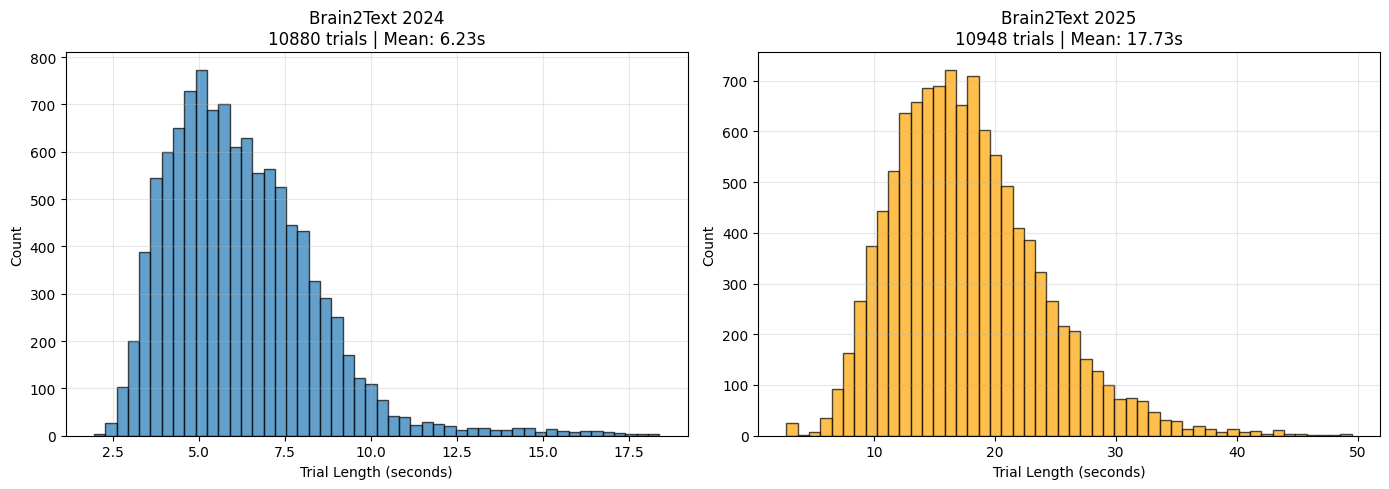


Brain2Text 2024:
  Total trials: 10880
  Mean length: 6.23 seconds
  Median length: 5.90 seconds
  Min length: 1.94 seconds
  Max length: 18.38 seconds

Brain2Text 2025:
  Total trials: 10948
  Mean length: 17.73 seconds
  Median length: 17.00 seconds
  Min length: 2.76 seconds
  Max length: 49.50 seconds


In [13]:
# Create histogram only if we have data
if len(lengths_24) > 0 and len(lengths_25) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Dataset 24
    axes[0].hist(lengths_24, bins=50, alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Trial Length (seconds)')
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Brain2Text 2024\n{len(lengths_24)} trials | Mean: {np.mean(lengths_24):.2f}s')
    axes[0].grid(alpha=0.3)
    
    # Dataset 25
    axes[1].hist(lengths_25, bins=50, alpha=0.7, edgecolor='black', color='orange')
    axes[1].set_xlabel('Trial Length (seconds)')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'Brain2Text 2025\n{len(lengths_25)} trials | Mean: {np.mean(lengths_25):.2f}s')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nBrain2Text 2024:")
    print(f"  Total trials: {len(lengths_24)}")
    print(f"  Mean length: {np.mean(lengths_24):.2f} seconds")
    print(f"  Median length: {np.median(lengths_24):.2f} seconds")
    print(f"  Min length: {np.min(lengths_24):.2f} seconds")
    print(f"  Max length: {np.max(lengths_24):.2f} seconds")
    
    print(f"\nBrain2Text 2025:")
    print(f"  Total trials: {len(lengths_25)}")
    print(f"  Mean length: {np.mean(lengths_25):.2f} seconds")
    print(f"  Median length: {np.median(lengths_25):.2f} seconds")
    print(f"  Min length: {np.min(lengths_25):.2f} seconds")
    print(f"  Max length: {np.max(lengths_25):.2f} seconds")
else:
    print("Error: No trial data found. Check dataset structure.")